# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score

In [2]:
! pip3 install catboost

# Read dataset

In [3]:
train = pd.read_csv('train_data.csv')
train.head(5)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


# Basic information

In [4]:
train.describe().round() #get statistical info like std, mean, min, max and so on

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,29165.0,29165.0,29165.0,29165.0,29165.0,29165.0,29165.0,29165.0,29165.0,29165.0,29165.0,29165.0
mean,5078232.0,0.0,186890.0,-15979.0,59258.0,1.0,0.0,0.0,0.0,2.0,-26.0,0.0
std,41824.0,1.0,101410.0,4203.0,137656.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0
min,5008804.0,0.0,27000.0,-25152.0,-15713.0,1.0,0.0,0.0,0.0,1.0,-60.0,0.0
25%,5042047.0,0.0,121500.0,-19444.0,-3153.0,1.0,0.0,0.0,0.0,2.0,-39.0,0.0
50%,5074666.0,0.0,157500.0,-15565.0,-1557.0,1.0,0.0,0.0,0.0,2.0,-24.0,0.0
75%,5114629.0,1.0,225000.0,-12475.0,-412.0,1.0,0.0,1.0,0.0,3.0,-12.0,0.0
max,5150485.0,19.0,1575000.0,-7705.0,365243.0,1.0,1.0,1.0,1.0,20.0,0.0,1.0


In [5]:
train.shape # number of observations(rows) & cols

(29165, 20)

In [6]:
train.info() # return nulls and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

**n. # non nulls in "Job title" column is 20138**

In [7]:
train.nunique(axis =0) #return number of unique values in each column 

ID                     29165
Gender                     2
Has a car                  2
Has a property             2
Children count             9
Income                   259
Employment status          5
Education level            5
Marital status             5
Dwelling                   6
Age                     6794
Employment length       3483
Has a mobile phone         1
Has a work phone           2
Has a phone                2
Has an email               2
Job title                 18
Family member count       10
Account age               61
Is high risk               2
dtype: int64

# Explore categories and value counts in each column

In [8]:
train["Gender"].value_counts()

Gender
F    19549
M     9616
Name: count, dtype: int64

In [9]:
train["Has a car"].value_counts()

Has a car
N    18128
Y    11037
Name: count, dtype: int64

In [10]:
train["Has a property"].value_counts()

Has a property
Y    19557
N     9608
Name: count, dtype: int64

In [11]:
train["Children count"].value_counts()

Children count
0     20143
1      6003
2      2624
3       323
4        52
5        15
7         2
14        2
19        1
Name: count, dtype: int64

In [12]:
train["Employment status"].value_counts()

Employment status
Working                 15056
Commercial associate     6801
Pensioner                4920
State servant            2381
Student                     7
Name: count, dtype: int64

In [13]:
train["Age"].value_counts()

Age
-12676    44
-15519    44
-16896    33
-16053    26
-16768    26
          ..
-18253     1
-23429     1
-15478     1
-21648     1
-19564     1
Name: count, Length: 6794, dtype: int64

In [14]:
train["Education level"].value_counts()

Education level
Secondary / secondary special    19803
Higher education                  7910
Incomplete higher                 1129
Lower secondary                    298
Academic degree                     25
Name: count, dtype: int64

In [15]:
train["Marital status"].value_counts()

Marital status
Married                 20044
Single / not married     3864
Civil marriage           2312
Separated                1712
Widow                    1233
Name: count, dtype: int64

In [16]:
train["Dwelling"].value_counts()

Dwelling
House / apartment      26059
With parents            1406
Municipal apartment      912
Rented apartment         453
Office apartment         208
Co-op apartment          127
Name: count, dtype: int64

In [17]:
train["Has a mobile phone"].value_counts()

Has a mobile phone
1    29165
Name: count, dtype: int64

In [18]:
train["Has a work phone"].value_counts()

Has a work phone
0    22623
1     6542
Name: count, dtype: int64

In [19]:
train["Has an email"].value_counts()

Has an email
0    26532
1     2633
Name: count, dtype: int64

In [20]:
train["Family member count"].value_counts()

Family member count
2.0     15552
1.0      5613
3.0      5121
4.0      2503
5.0       309
6.0        48
7.0        14
9.0         2
15.0        2
20.0        1
Name: count, dtype: int64

In [21]:
train["Account age"].value_counts()

Account age
-7.0     690
-6.0     669
-17.0    659
-5.0     656
-8.0     655
        ... 
-58.0    270
-59.0    250
-60.0    249
 0.0     247
-57.0    244
Name: count, Length: 61, dtype: int64

In [22]:
train[["Income"]].value_counts()

Income  
135000.0    3468
180000.0    2487
157500.0    2469
225000.0    2373
112500.0    2359
            ... 
89550.0        1
89100.0        1
87448.5        1
82350.0        1
27000.0        1
Name: count, Length: 259, dtype: int64

# Drop unneeded data
***
## 1- columns

#### --> **set "ID" as index**

#### --> **Drop "Age", "Employment length", "job title" , "Account age", "Family member count", "Educational level"**

## 2- Values in each column

#### --> **Drop "Children count" > 5**



In [23]:
train.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [24]:
# drop unnecessary cols, set "ID" as index
select_tr = train.drop(labels = ["Age", "Employment length", "Job title", "Family member count", "Account age", "Education level"], axis = 1)
sel_tr = select_tr.set_index("ID")
sel_tr

,Gender,Has a car,Has a property,Children count,Income,Employment status,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk
ID,,,,,,,,,,,,,
5037048,M,Y,Y,0,135000.0,Working,Married,With parents,1,0,0,0,0
5044630,F,Y,N,1,135000.0,Commercial associate,Single / not married,House / apartment,1,0,0,0,0
5079079,F,N,Y,2,180000.0,Commercial associate,Married,House / apartment,1,0,0,0,0
5112872,F,Y,Y,0,360000.0,Commercial associate,Single / not married,House / apartment,1,0,0,1,0
5105858,F,N,N,0,270000.0,Working,Separated,House / apartment,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067139,F,N,Y,0,112500.0,Pensioner,Single / not married,House / apartment,1,0,1,1,0
5029193,F,N,Y,1,135000.0,Commercial associate,Married,House / apartment,1,0,0,0,0
5047710,F,N,Y,0,76500.0,Working,Married,House / apartment,1,1,1,0,0


In [25]:
# Drop rows  where children count > 5
i = sel_tr[sel_tr['Children count'] > 5].index
#len(i) # check rows number which will be dropped
sel_tr.drop(i, inplace = True)
sel_tr.shape

(29160, 13)

In [26]:
sel_tr

,Gender,Has a car,Has a property,Children count,Income,Employment status,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk
ID,,,,,,,,,,,,,
5037048,M,Y,Y,0,135000.0,Working,Married,With parents,1,0,0,0,0
5044630,F,Y,N,1,135000.0,Commercial associate,Single / not married,House / apartment,1,0,0,0,0
5079079,F,N,Y,2,180000.0,Commercial associate,Married,House / apartment,1,0,0,0,0
5112872,F,Y,Y,0,360000.0,Commercial associate,Single / not married,House / apartment,1,0,0,1,0
5105858,F,N,N,0,270000.0,Working,Separated,House / apartment,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067139,F,N,Y,0,112500.0,Pensioner,Single / not married,House / apartment,1,0,1,1,0
5029193,F,N,Y,1,135000.0,Commercial associate,Married,House / apartment,1,0,0,0,0
5047710,F,N,Y,0,76500.0,Working,Married,House / apartment,1,1,1,0,0


# Faeture Engineering

 **1- "Employmnet status" into  2 categories (Not employed: Pensioner, Student; Employed: Working, Commercial associate, State servant)**

**2- Regroup "Marital status" into  2 categories: (not married: Single / not married', 'Widow', 'Separated' ; married)**   

**3- Regroup "Dwelling" into 2 categories (dependent: (With parents, Municipal,  Rented, Office, Co-op apartment); independent: (House / apartment))**

In [27]:
def Employ(x):
    if x in ['Pensioner', 'Student']:
        return 'Not employed'
    elif x in ['Working', 'Commercial associate', 'State servant']:
        return 'Employed'
    else:
        return 'No match'

sel_tr['Employ'] = sel_tr['Employment status'].apply(Employ)

sel_tr

,Gender,Has a car,Has a property,Children count,Income,Employment status,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk,Employ
ID,,,,,,,,,,,,,,
5037048,M,Y,Y,0,135000.0,Working,Married,With parents,1,0,0,0,0,Employed
5044630,F,Y,N,1,135000.0,Commercial associate,Single / not married,House / apartment,1,0,0,0,0,Employed
5079079,F,N,Y,2,180000.0,Commercial associate,Married,House / apartment,1,0,0,0,0,Employed
5112872,F,Y,Y,0,360000.0,Commercial associate,Single / not married,House / apartment,1,0,0,1,0,Employed
5105858,F,N,N,0,270000.0,Working,Separated,House / apartment,1,0,1,0,0,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067139,F,N,Y,0,112500.0,Pensioner,Single / not married,House / apartment,1,0,1,1,0,Not employed
5029193,F,N,Y,1,135000.0,Commercial associate,Married,House / apartment,1,0,0,0,0,Employed
5047710,F,N,Y,0,76500.0,Working,Married,House / apartment,1,1,1,0,0,Employed


In [28]:
def Social(x):
    if x in ['Married', 'Civil marriage']:
        return 'Married'
    elif x in ['Single / not married', 'Widow', 'Separated']:
        return 'Not Married'
    else:
        return 'No match'

sel_tr['Social state'] = sel_tr['Marital status'].apply(Social)

sel_tr

,Gender,Has a car,Has a property,Children count,Income,Employment status,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk,Employ,Social state
ID,,,,,,,,,,,,,,,
5037048,M,Y,Y,0,135000.0,Working,Married,With parents,1,0,0,0,0,Employed,Married
5044630,F,Y,N,1,135000.0,Commercial associate,Single / not married,House / apartment,1,0,0,0,0,Employed,Not Married
5079079,F,N,Y,2,180000.0,Commercial associate,Married,House / apartment,1,0,0,0,0,Employed,Married
5112872,F,Y,Y,0,360000.0,Commercial associate,Single / not married,House / apartment,1,0,0,1,0,Employed,Not Married
5105858,F,N,N,0,270000.0,Working,Separated,House / apartment,1,0,1,0,0,Employed,Not Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067139,F,N,Y,0,112500.0,Pensioner,Single / not married,House / apartment,1,0,1,1,0,Not employed,Not Married
5029193,F,N,Y,1,135000.0,Commercial associate,Married,House / apartment,1,0,0,0,0,Employed,Married
5047710,F,N,Y,0,76500.0,Working,Married,House / apartment,1,1,1,0,0,Employed,Married


In [29]:
def Ind(x):
    if x == 'House / apartment':
        return 'Independent'
    elif x in ['With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']:
        return 'Dependent'
    else:
         return 'No match'
        
sel_tr['Independency'] = sel_tr['Dwelling'].apply(Ind)
sel_tr       

,Gender,Has a car,Has a property,Children count,Income,Employment status,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk,Employ,Social state,Independency
ID,,,,,,,,,,,,,,,,
5037048,M,Y,Y,0,135000.0,Working,Married,With parents,1,0,0,0,0,Employed,Married,Dependent
5044630,F,Y,N,1,135000.0,Commercial associate,Single / not married,House / apartment,1,0,0,0,0,Employed,Not Married,Independent
5079079,F,N,Y,2,180000.0,Commercial associate,Married,House / apartment,1,0,0,0,0,Employed,Married,Independent
5112872,F,Y,Y,0,360000.0,Commercial associate,Single / not married,House / apartment,1,0,0,1,0,Employed,Not Married,Independent
5105858,F,N,N,0,270000.0,Working,Separated,House / apartment,1,0,1,0,0,Employed,Not Married,Independent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067139,F,N,Y,0,112500.0,Pensioner,Single / not married,House / apartment,1,0,1,1,0,Not employed,Not Married,Independent
5029193,F,N,Y,1,135000.0,Commercial associate,Married,House / apartment,1,0,0,0,0,Employed,Married,Independent
5047710,F,N,Y,0,76500.0,Working,Married,House / apartment,1,1,1,0,0,Employed,Married,Independent


## Drop unneeded columns 

--> **'Employment status'** 

--> **'Marital status'**

--> **'Dwelling'**

In [30]:
modified_tr = sel_tr.drop(['Employment status', 'Marital status', 'Dwelling'], axis = 1)
modified_tr

,Gender,Has a car,Has a property,Children count,Income,Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk,Employ,Social state,Independency
ID,,,,,,,,,,,,,
5037048,M,Y,Y,0,135000.0,1,0,0,0,0,Employed,Married,Dependent
5044630,F,Y,N,1,135000.0,1,0,0,0,0,Employed,Not Married,Independent
5079079,F,N,Y,2,180000.0,1,0,0,0,0,Employed,Married,Independent
5112872,F,Y,Y,0,360000.0,1,0,0,1,0,Employed,Not Married,Independent
5105858,F,N,N,0,270000.0,1,0,1,0,0,Employed,Not Married,Independent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067139,F,N,Y,0,112500.0,1,0,1,1,0,Not employed,Not Married,Independent
5029193,F,N,Y,1,135000.0,1,0,0,0,0,Employed,Married,Independent
5047710,F,N,Y,0,76500.0,1,1,1,0,0,Employed,Married,Independent


In [31]:
modified_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29160 entries, 5037048 to 5062632
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              29160 non-null  object 
 1   Has a car           29160 non-null  object 
 2   Has a property      29160 non-null  object 
 3   Children count      29160 non-null  int64  
 4   Income              29160 non-null  float64
 5   Has a mobile phone  29160 non-null  int64  
 6   Has a work phone    29160 non-null  int64  
 7   Has a phone         29160 non-null  int64  
 8   Has an email        29160 non-null  int64  
 9   Is high risk        29160 non-null  int64  
 10  Employ              29160 non-null  object 
 11  Social state        29160 non-null  object 
 12  Independency        29160 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 3.1+ MB


C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


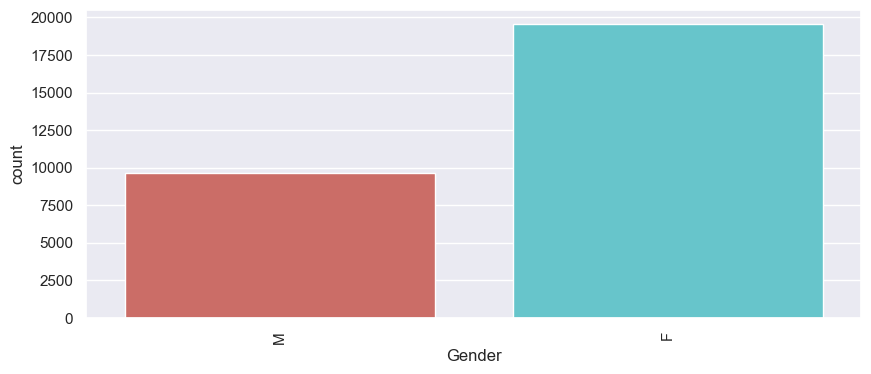

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


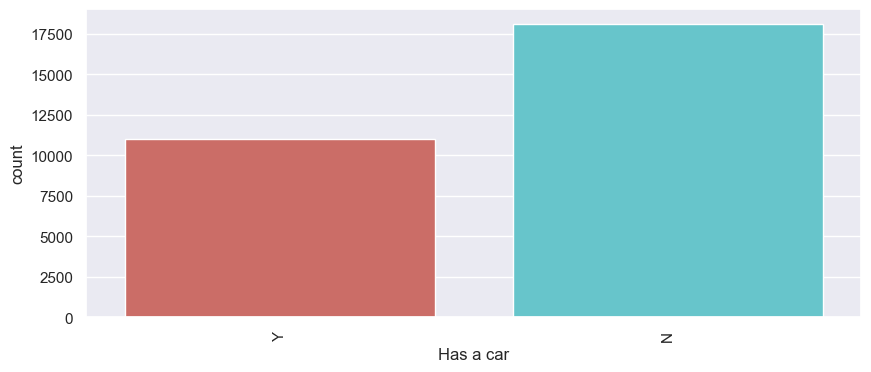

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


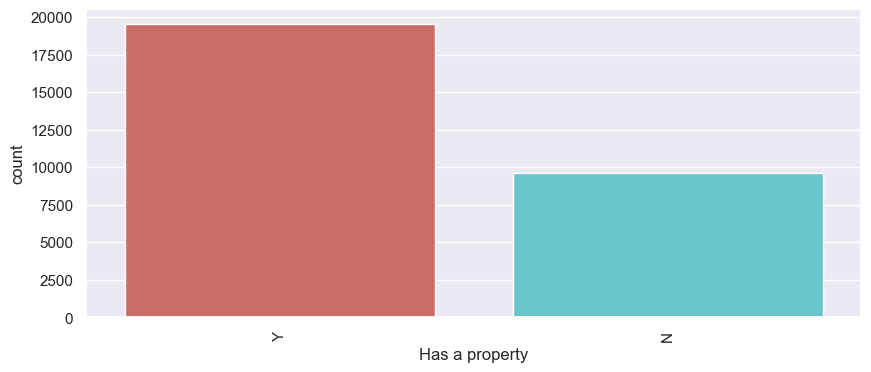

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


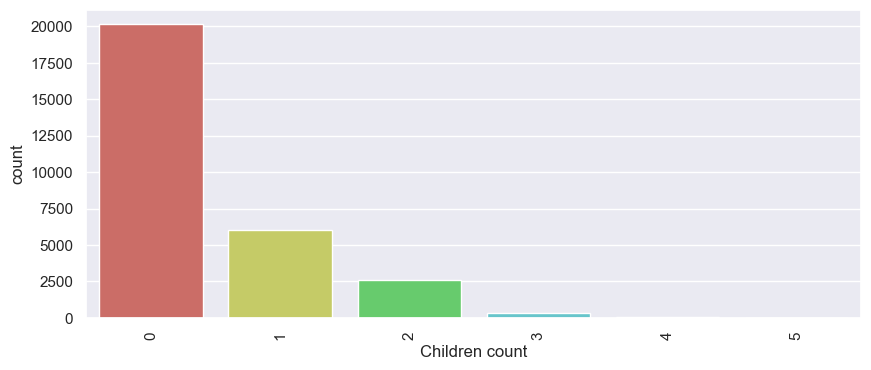

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


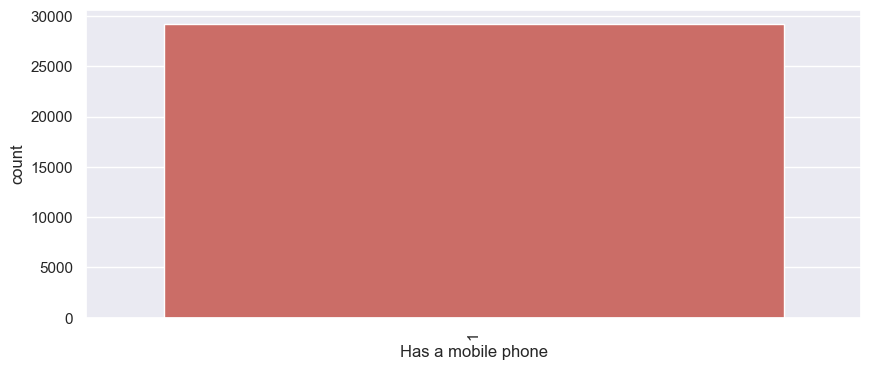

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


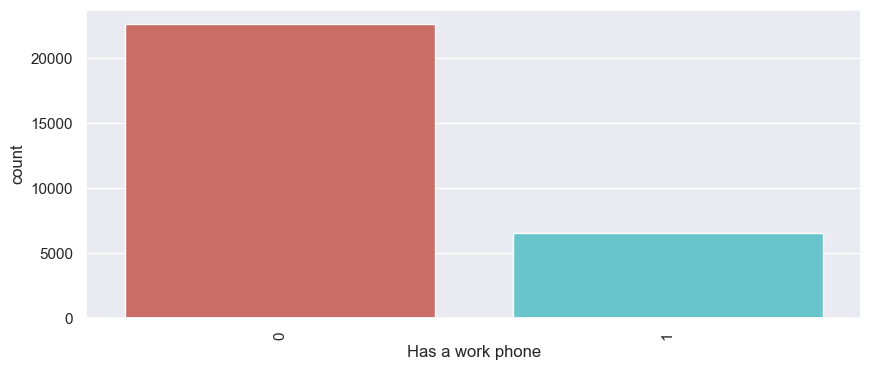

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


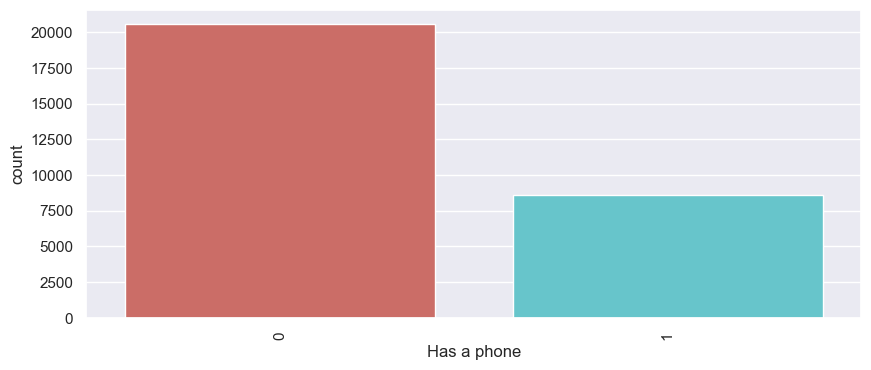

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


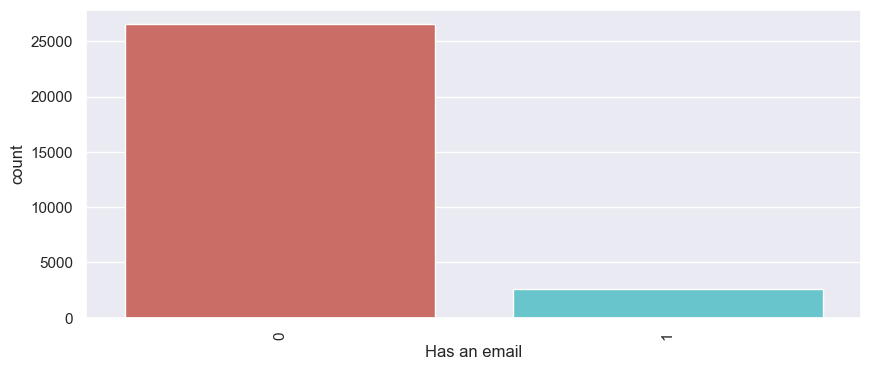

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


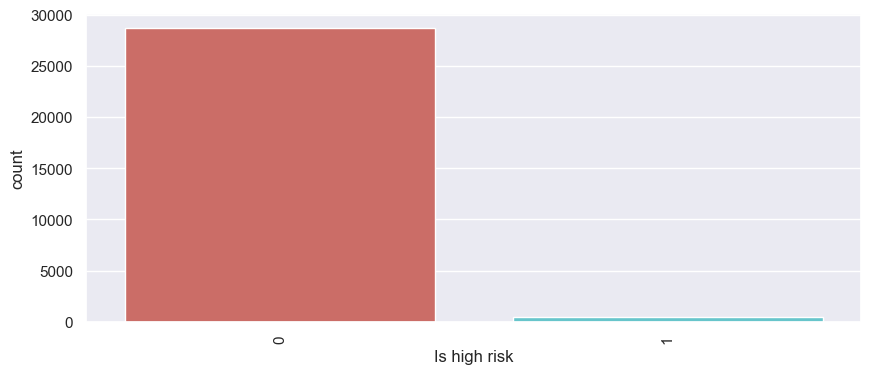

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


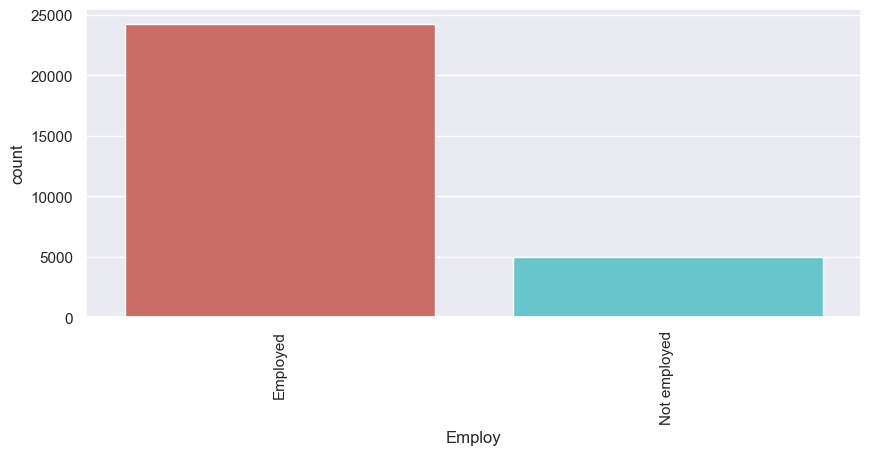

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


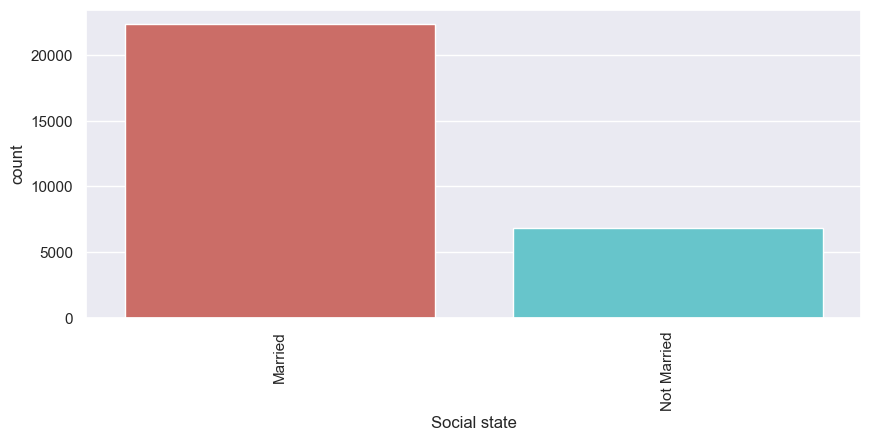

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\1146075012.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = Vis[i], data = Vis, palette = 'hls')


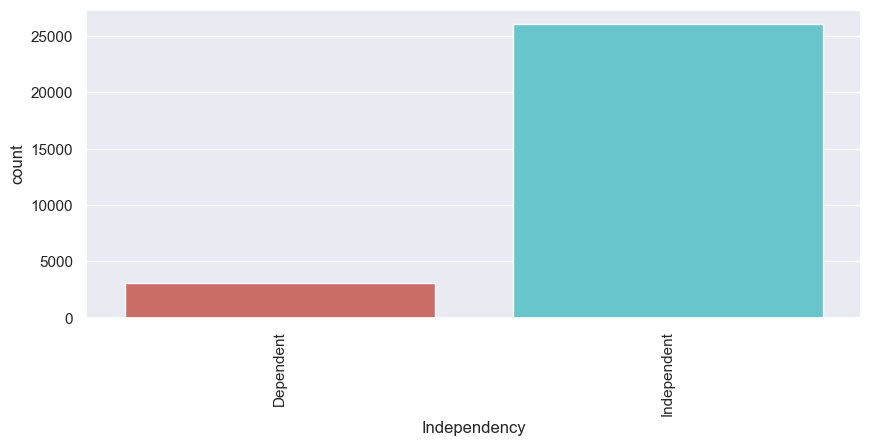

In [32]:
Vis = modified_tr.drop('Income', axis = 1)
for i in Vis.columns:
    plt.figure(figsize=(10,4))
    sns.countplot( x = Vis[i], data = Vis, palette = 'hls') 
    plt.xticks(rotation = 90)
    plt.show()

C:\Users\Jay Thoriya\AppData\Local\Temp\ipykernel_6088\3007221402.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modified_tr['Income'], color="purple").set_title('Income')


Text(0.5, 1.0, 'Income')

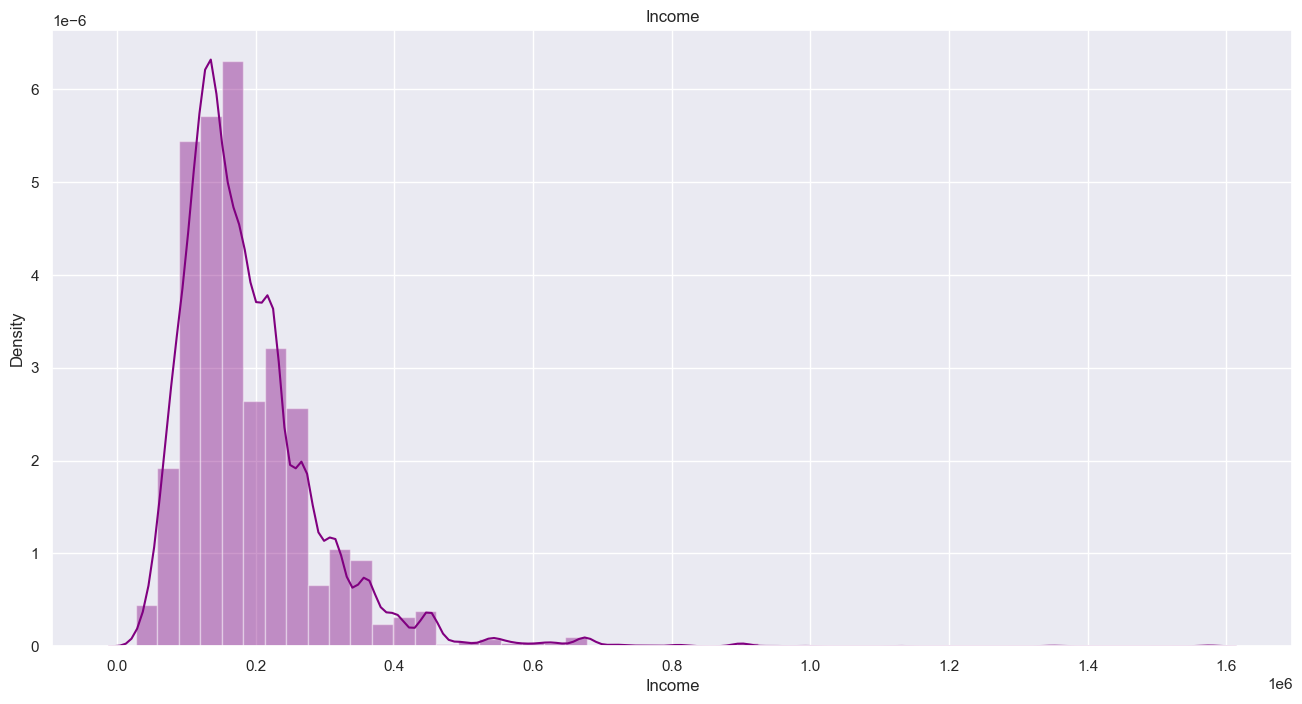

In [33]:
plt.figure(figsize=(16, 8))
sns.distplot(modified_tr['Income'], color="purple").set_title('Income')

# Apply all preprocessing to test data
 

In [34]:
test = pd.read_csv('test_data.csv')
test.head(5)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [35]:
test.shape

(7292, 20)

In [36]:
#test.info()
#test.describe()
#test.nunique(axis =0) #return number of unique values in each column 


# drop unnecessary cols, set "ID" as index
select_ts = test.drop(["Age", "Employment length", "Job title", "Family member count", "Account age", "Education level"], axis = 1)
sel_ts = select_ts.set_index("ID")


# Drop rows  where children count > 5
i = sel_ts[sel_ts['Children count'] > 5].index
#len(i) # check rows number which will be dropped
sel_ts.drop(i, inplace = True)


# --> "Employmnet status" into 2 categories ([0: Pensioner, Student; 1: Working, Commercial associate, State servant])
sel_ts['Employ'] = sel_ts['Employment status'].apply(Employ)


# --> Regroup "Marital status" into 2 categories (0:not married ; 1: married)
sel_ts['Social state'] = sel_ts['Marital status'].apply(Social)


# --> Regroup "Dwelling" into 2 categories (0: dependent (With parents, Municipal, Rented, Office, Co-op apartment); 1: independent (House / apartment))
sel_ts['Independency'] = sel_ts['Dwelling'].apply(Ind)
sel_ts

# --> Drop unneeded columns : 'Employment status', 'Marital status', 'Dwelling
modified_ts=  sel_ts.drop(['Employment status', 'Marital status', 'Dwelling'], axis = 1)
modified_ts

,Gender,Has a car,Has a property,Children count,Income,Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk,Employ,Social state,Independency
ID,,,,,,,,,,,,,
5091261,F,N,Y,0,202500.0,1,0,0,0,0,Employed,Not Married,Independent
5096963,M,Y,N,0,675000.0,1,0,1,0,0,Employed,Married,Independent
5087880,F,N,N,0,234000.0,1,0,0,1,0,Employed,Married,Independent
5021949,F,Y,Y,0,445500.0,1,0,0,0,0,Employed,Married,Independent
5105705,F,Y,N,0,225000.0,1,0,0,0,0,Employed,Married,Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115415,F,Y,Y,0,135000.0,1,0,0,0,0,Employed,Married,Independent
5068826,F,Y,Y,0,157500.0,1,0,0,1,0,Employed,Married,Independent
5026088,F,N,Y,0,67500.0,1,1,1,0,0,Employed,Not Married,Independent


## Defin faetures X and Target y

In [37]:
# Defin faetures X and Target y in Train dataframe
X = modified_tr.drop('Is high risk', axis = 1)
y= modified_tr['Is high risk']

In [38]:
#X

In [39]:
#Defin faetures X and Target y in test dataframe
X_test =modified_ts.drop('Is high risk', axis = 1)
y_test = modified_ts['Is high risk']

In [40]:
encoder = LabelEncoder()

X['Gender'] = encoder.fit_transform(X['Gender'])
X['Has a car'] = encoder.fit_transform(X['Has a car'])
X['Has a property'] = encoder.fit_transform(X['Has a property'])
X['Employ'] = encoder.fit_transform(X['Employ'])
X['Social state'] = encoder.fit_transform(X['Social state'])
X['Independency'] = encoder.fit_transform(X['Independency'])


In [41]:
X

,Gender,Has a car,Has a property,Children count,Income,Has a mobile phone,Has a work phone,Has a phone,Has an email,Employ,Social state,Independency
ID,,,,,,,,,,,,
5037048,1,1,1,0,135000.0,1,0,0,0,0,0,0
5044630,0,1,0,1,135000.0,1,0,0,0,0,1,1
5079079,0,0,1,2,180000.0,1,0,0,0,0,0,1
5112872,0,1,1,0,360000.0,1,0,0,1,0,1,1
5105858,0,0,0,0,270000.0,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5067139,0,0,1,0,112500.0,1,0,1,1,1,1,1
5029193,0,0,1,1,135000.0,1,0,0,0,0,0,1
5047710,0,0,1,0,76500.0,1,1,1,0,0,0,1


In [42]:
encoder = LabelEncoder()

X_test['Gender'] = encoder.fit_transform(X_test['Gender'])
X_test['Has a car'] = encoder.fit_transform(X_test['Has a car'])
X_test['Has a property'] = encoder.fit_transform(X_test['Has a property'])
X_test['Employ'] = encoder.fit_transform(X_test['Employ'])
X_test['Social state'] = encoder.fit_transform(X_test['Social state'])
X_test['Independency'] = encoder.fit_transform(X_test['Independency'])

In [43]:
X_test

,Gender,Has a car,Has a property,Children count,Income,Has a mobile phone,Has a work phone,Has a phone,Has an email,Employ,Social state,Independency
ID,,,,,,,,,,,,
5091261,0,0,1,0,202500.0,1,0,0,0,0,1,1
5096963,1,1,0,0,675000.0,1,0,1,0,0,0,1
5087880,0,0,0,0,234000.0,1,0,0,1,0,0,1
5021949,0,1,1,0,445500.0,1,0,0,0,0,0,1
5105705,0,1,0,0,225000.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5115415,0,1,1,0,135000.0,1,0,0,0,0,0,1
5068826,0,1,1,0,157500.0,1,0,0,1,0,0,1
5026088,0,0,1,0,67500.0,1,1,1,0,0,1,1


In [44]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

# Machine Learning Models

## 1- Decision Tree Calssifier

In [45]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)

DecisionTreeClassifier()

In [46]:
dt_classifier.score(X, y)

0.9856652949245542

In [47]:
y_pred = dt_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9818954875874366


Feature: 0  Score: 0.0
Feature: 1  Score: 0.0024622770919067614
Feature: 2  Score: 0.0034019204389575063
Feature: 3  Score: 0.0035528120713306244
Feature: 4  Score: 0.004773662551440383
Feature: 5  Score: 0.007455418381344381
Feature: 6  Score: 0.007578875171467825
Feature: 7  Score: 0.00848422496570651
Feature: 8  Score: 0.008957475994513086
Feature: 9  Score: 0.01139231824417013
Feature: 10  Score: 0.011783264746227751
Feature: 11  Score: 0.024327846364883454


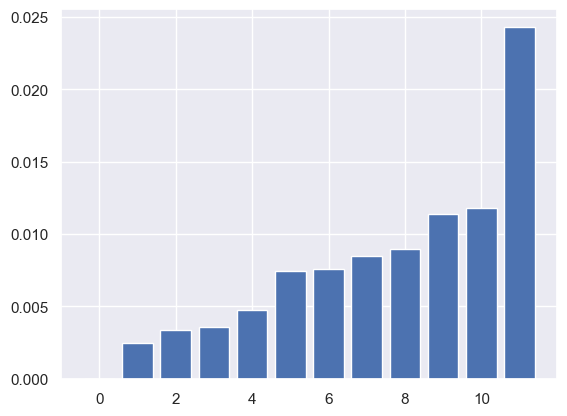

In [48]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(dt_classifier, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

## 2- Random Forest Classifier

In [49]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X, y)

RandomForestClassifier()

In [50]:
rf_classifier.score(X, y)

0.9856652949245542

In [51]:
y_pred = rf_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9820326429845014


Feature: 0  Score: 0.0
Feature: 1  Score: 0.001385459533607758
Feature: 2  Score: 0.0013991769547325506
Feature: 3  Score: 0.0019204389574760672
Feature: 4  Score: 0.0025514403292181465
Feature: 5  Score: 0.0027709190672154495
Feature: 6  Score: 0.0029629629629629893
Feature: 7  Score: 0.003031550068587152
Feature: 8  Score: 0.0032784636488340847
Feature: 9  Score: 0.0036282578875172166
Feature: 10  Score: 0.005500685871056299
Feature: 11  Score: 0.006028806584362179


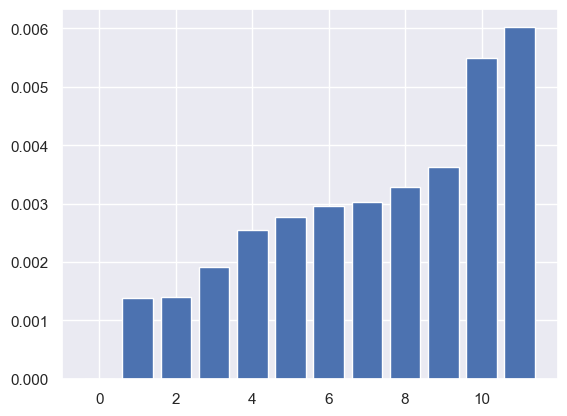

In [53]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(rf_classifier, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

## 3- Bagging Classifier

In [54]:
bg_Classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier())
bg_Classifier.fit(X, y)

C:\Users\Jay Thoriya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [55]:
bg_Classifier.score(X, y)

0.9852537722908093

In [56]:
y_pred = bg_Classifier.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.982581264572761


Feature: 0  Score: 0.0
Feature: 1  Score: 0.0011385459533608034
Feature: 2  Score: 0.0016255144032921941
Feature: 3  Score: 0.002016460905349815
Feature: 4  Score: 0.0020370370370370594
Feature: 5  Score: 0.003504801097393728
Feature: 6  Score: 0.0038134430727023495
Feature: 7  Score: 0.003834019204389594
Feature: 8  Score: 0.004204389574759948
Feature: 9  Score: 0.0057818930041152235
Feature: 10  Score: 0.006495198902606347
Feature: 11  Score: 0.006707818930041176


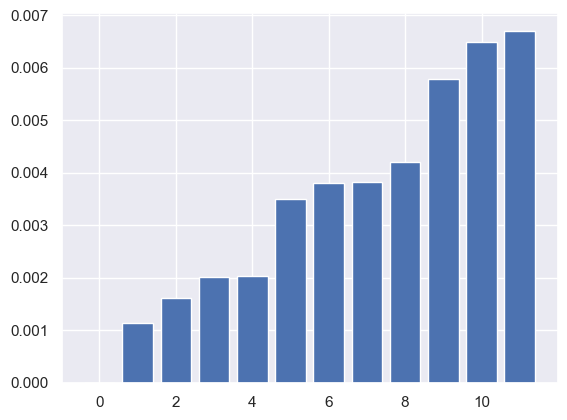

In [57]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(bg_Classifier, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

## 4- Categorical Boosting Classifier

In [58]:
catboost_classifier = CatBoostClassifier(iterations=100)
catboost_classifier.fit(X, y)

Learning rate set to 0.359251
0:	learn: 0.4192197	total: 154ms	remaining: 15.2s
1:	learn: 0.2851173	total: 158ms	remaining: 7.76s
2:	learn: 0.2076646	total: 163ms	remaining: 5.27s
3:	learn: 0.1603617	total: 167ms	remaining: 4s
4:	learn: 0.1310832	total: 171ms	remaining: 3.25s
5:	learn: 0.1126800	total: 174ms	remaining: 2.72s
6:	learn: 0.1013318	total: 183ms	remaining: 2.43s
7:	learn: 0.0945137	total: 192ms	remaining: 2.21s
8:	learn: 0.0905692	total: 200ms	remaining: 2.02s
9:	learn: 0.0883598	total: 206ms	remaining: 1.85s
10:	learn: 0.0871165	total: 209ms	remaining: 1.69s
11:	learn: 0.0863317	total: 214ms	remaining: 1.57s
12:	learn: 0.0858954	total: 216ms	remaining: 1.45s
13:	learn: 0.0852220	total: 220ms	remaining: 1.35s
14:	learn: 0.0847135	total: 224ms	remaining: 1.27s
15:	learn: 0.0845532	total: 229ms	remaining: 1.2s
16:	learn: 0.0842287	total: 233ms	remaining: 1.14s
17:	learn: 0.0838845	total: 237ms	remaining: 1.08s
18:	learn: 0.0836278	total: 241ms	remaining: 1.03s
19:	learn: 0.08

In [59]:
catboost_classifier.score(X, y)

0.9830246913580247

In [60]:
y_pred = catboost_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9839528185434097


Feature: 0  Score: 0.0
Feature: 1  Score: 6.858710562429593e-06
Feature: 2  Score: 1.3717421124859186e-05
Feature: 3  Score: 2.057613168728878e-05
Feature: 4  Score: 2.7434842249673964e-05
Feature: 5  Score: 3.429355281210355e-05
Feature: 6  Score: 0.00010973936899865145
Feature: 7  Score: 0.00011659807956108104
Feature: 8  Score: 0.00013031550068594023
Feature: 9  Score: 0.00015775034293556977
Feature: 10  Score: 0.00018518518518522152
Feature: 11  Score: 0.0007338820301783455


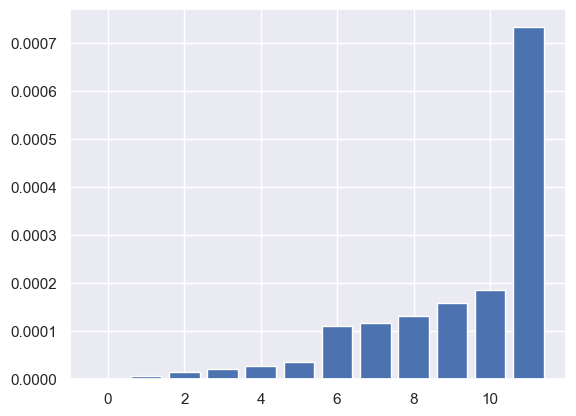

In [61]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(catboost_classifier, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

# Auto Machine Learning Model

## Voting Classifier

In [62]:
voting_classifier = VotingClassifier(estimators=[
    ('dt', dt_classifier),
    ('rf', rf_classifier),
    ('bagging', bg_Classifier),
    ('catboost', catboost_classifier)
], voting='hard')

voting_classifier.fit(X, y)

C:\Users\Jay Thoriya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Learning rate set to 0.359251
0:	learn: 0.4192197	total: 4.22ms	remaining: 418ms
1:	learn: 0.2851173	total: 8.45ms	remaining: 414ms
2:	learn: 0.2076646	total: 12.6ms	remaining: 406ms
3:	learn: 0.1603617	total: 16ms	remaining: 385ms
4:	learn: 0.1310832	total: 19.8ms	remaining: 376ms
5:	learn: 0.1126800	total: 22.8ms	remaining: 358ms
6:	learn: 0.1013318	total: 25ms	remaining: 332ms
7:	learn: 0.0945137	total: 28ms	remaining: 322ms
8:	learn: 0.0905692	total: 32.1ms	remaining: 324ms
9:	learn: 0.0883598	total: 36.3ms	remaining: 327ms
10:	learn: 0.0871165	total: 39.3ms	remaining: 318ms
11:	learn: 0.0863317	total: 43ms	remaining: 315ms
12:	learn: 0.0858954	total: 45.4ms	remaining: 304ms
13:	learn: 0.0852220	total: 49.1ms	remaining: 302ms
14:	learn: 0.0847135	total: 53.3ms	remaining: 302ms
15:	learn: 0.0845532	total: 57.5ms	remaining: 302ms
16:	learn: 0.0842287	total: 61.6ms	remaining: 301ms
17:	learn: 0.0838845	total: 65.3ms	remaining: 298ms
18:	learn: 0.0836278	total: 69.1ms	remaining: 295ms


VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('bagging',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier())),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x0000024A47E2F010>)])

In [63]:
voting_classifier.score(X, y)

0.9853223593964334

In [64]:
y_pred = voting_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9829927307639555


Feature: 0  Score: 0.0
Feature: 1  Score: 0.0011111111111110849
Feature: 2  Score: 0.001207133058984855
Feature: 3  Score: 0.0013648834019203803
Feature: 4  Score: 0.0022153635116597846
Feature: 5  Score: 0.002311385459533577
Feature: 6  Score: 0.002318244170095962
Feature: 7  Score: 0.002482853223593917
Feature: 8  Score: 0.002496570644718754
Feature: 9  Score: 0.0025102880658435687
Feature: 10  Score: 0.00364883401920435
Feature: 11  Score: 0.004807956104252354


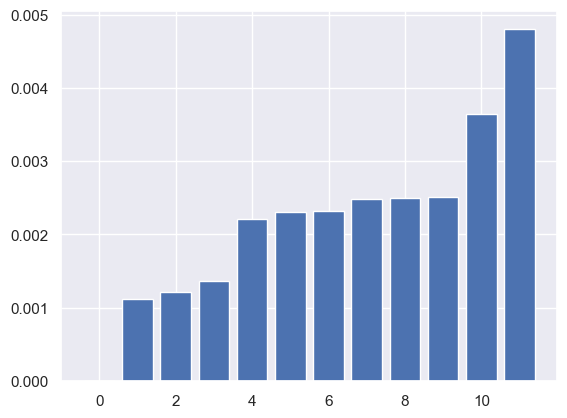

In [65]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# perform permutation importance
results = permutation_importance(voting_classifier, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()